**линейная регрессия, градиентный спуск **

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# загружаем даные
data = np.loadtxt('../data/1000b/points.txt')

print( data.shape )
print( data.min(axis=0), data.max(axis=0) )

(1000, 2)
[0. 0.] [111.784913  93.429631]


In [3]:
n_ex = data.shape[0] # количество примеров

In [4]:
X = data[:,0:-1] # признаки
y = data[:,-1] # ответ

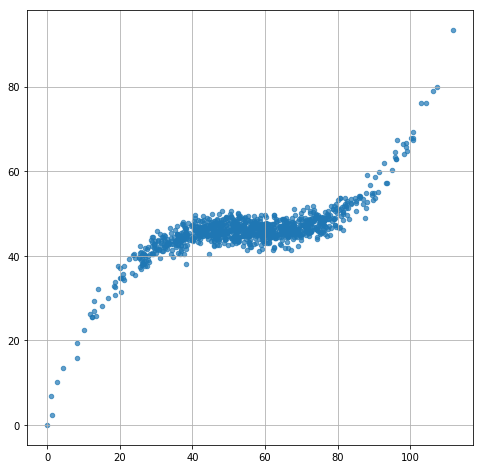

In [5]:
# рисуем исходные данные
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.grid()
plt.show()

In [6]:
# масштабируем признаки в [-1,1]
X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

In [7]:
Xp = np.hstack([np.ones([n_ex,1]),X]) # добавляем столбец из единиц (свободный член)

---

In [8]:
# инициализация параметров
n_param = Xp.shape[1]

# T = np.random.rand(n_param)
T = np.array( [0] + [1]*(n_param-1) )
T.shape

(2,)

In [9]:
%%time

# метод градиентного спуска

a=1e-1 # скорость обучени
ex_count = Xp.shape[0]   # количество примеров

MAX_ITER = 500 # максимальное число циклов обучения
MIN_ERROR = 9.6 # порог минимальной ошибки

ex_count_div = 1.0/(2.0*ex_count)

er_hist=[]
    
for i in range(MAX_ITER):
    O = Xp.dot(T) # выход
    E = O - y # ошибка
    er = ex_count_div*E.dot(E.T) # средняя квадратичная ошибка
    er_hist.append(er)
  
    # print('step %i/%i: %.03f'%(i+1,MAX_ITER,er))
       
    if er < MIN_ERROR: # проверяем достижение порога
        print('step %i/%i: error bound %.03f'%(i+1,MAX_ITER,er))
        break
    
    #E = np.tile(E, ( n_param,1) ).T # дублируем столбцы по количеству параметров
    #dT = a*ex_count_div*( (Xp*E).sum(axis=0) ) # изменение весов
    dT = ex_count_div*Xp.T.dot(E) # изменение весов

    T = T - a*dT # корректируем параметры

step 184/500: error bound 9.592
CPU times: user 7.32 ms, sys: 0 ns, total: 7.32 ms
Wall time: 7.01 ms


In [10]:
print(T)
print(er)

[46.04925378  8.57552205]
9.592188696479182


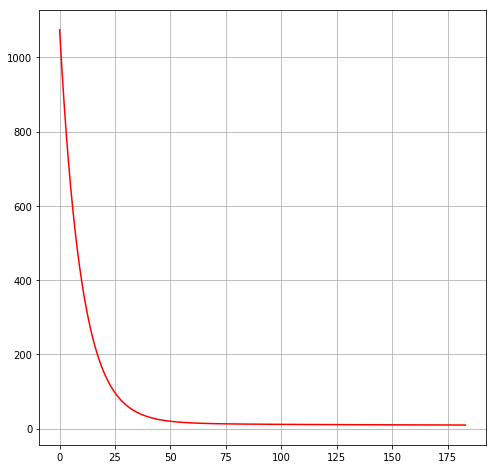

In [11]:
# рисуем изменение ф-ции потери
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.plot(range(len(er_hist)),er_hist,'-r')
plt.grid()
plt.show()

In [12]:
# вектор-столбец крайние значения признака
xx = np.array([ X.min(), X.max(), ]).reshape((2,1)) 

# значение регрессии для xx
yy = np.hstack([np.ones([2,1]),xx]).dot(T)


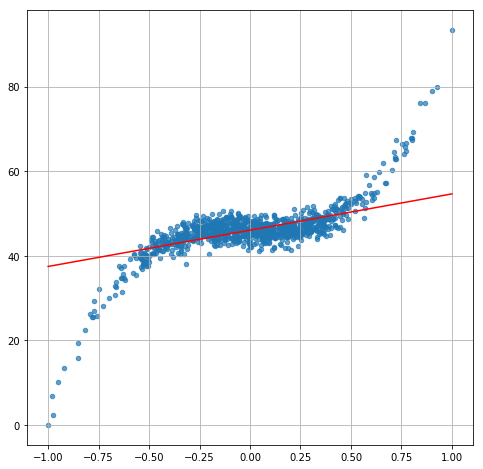

In [13]:
plt.gcf().set_size_inches(8, 8) # размер картинки
plt.scatter(x=X,y=y,s=20,alpha=0.7) # точки учебного набора
plt.plot(xx,yy,'-r') # линия регрессии
plt.grid()
plt.show()